# Goal of this HW  
預測顧客是否會網購商品，是二元分類問題。

# Data  
Online Shoppers Purchasing Intention Dataset Data Set : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset  
attribute information:  
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Import libralies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import math

data = pd.read_csv('source/online_shoppers_intention.csv')
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

是否有缺失值

In [3]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data preprocession

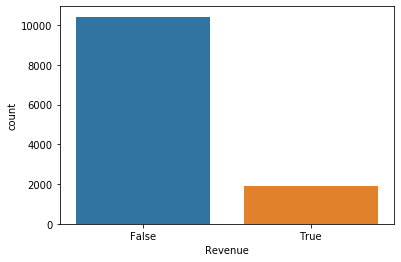

In [4]:
sns.countplot(data['Revenue'])

只看不買的人數明顯高於購買人數。

   Weekend   Revenue
1     True  0.173989
0    False  0.148911


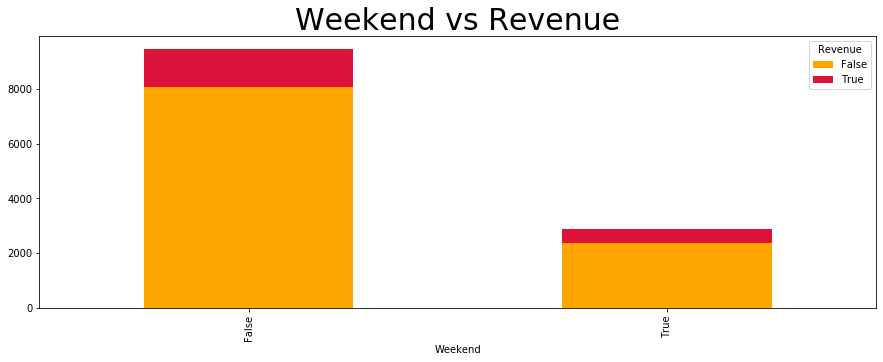

In [5]:
# weekend vs Revenue
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)

print(data[['Weekend', 'Revenue']].groupby(['Weekend'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

在較無空閒的工作日購買人數和意願明顯較高。

   SpecialDay   Revenue
0         0.0  0.165268
3         0.6  0.082621
1         0.2  0.078652
5         1.0  0.064935
2         0.4  0.053498
4         0.8  0.033846


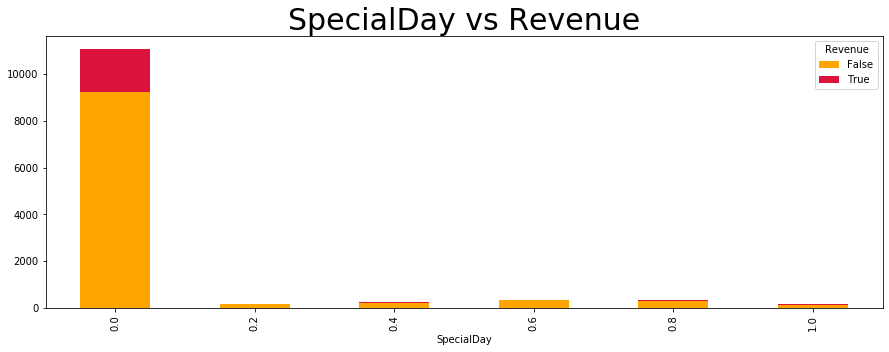

In [6]:
# SpecialDay vs Revenue
df = pd.crosstab(data['SpecialDay'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('SpecialDay vs Revenue', fontsize = 30)

print(data[['SpecialDay', 'Revenue']].groupby(['SpecialDay'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

特定月份的特定節日會有較多人瀏覽網站，也會有較大購買意願。

   OperatingSystems   Revenue
7                 8  0.215190
3                 4  0.177824
1                 2  0.174973
4                 5  0.166667
0                 1  0.146615
6                 7  0.142857
5                 6  0.105263
2                 3  0.104892


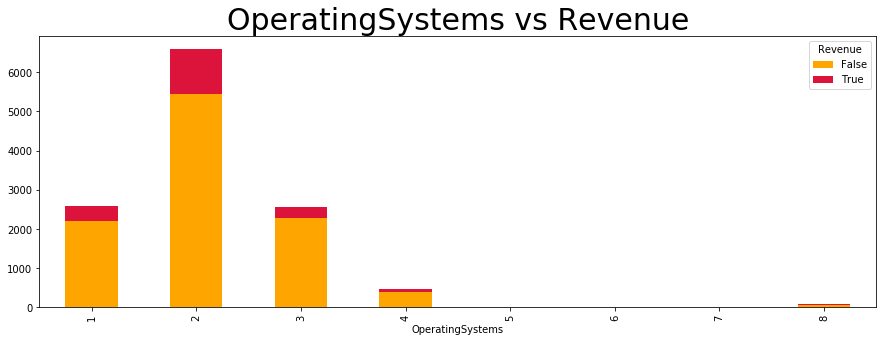

In [7]:
# OperatingSystems vs Revenue
df = pd.crosstab(data['OperatingSystems'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('OperatingSystems vs Revenue', fontsize = 30)

print(data[['OperatingSystems', 'Revenue']].groupby(['OperatingSystems'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

作業系統少量影響購買意願。

    Browser   Revenue
11       12  0.300000
12       13  0.262295
9        10  0.196319
4         5  0.184154
3         4  0.176630
10       11  0.166667
7         8  0.155556
1         2  0.153624
0         1  0.148253
6         7  0.122449
5         6  0.114943
2         3  0.047619
8         9  0.000000


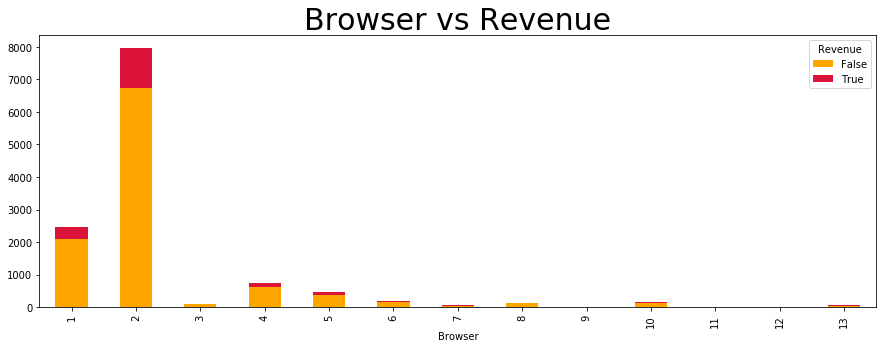

In [8]:
# Browser vs Revenue
df = pd.crosstab(data['Browser'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Browser vs Revenue', fontsize = 30)

print(data[['Browser', 'Revenue']].groupby(['Browser'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

瀏覽器會影響購買意願。

   Region   Revenue
8       9  0.168297
1       2  0.165493
4       5  0.163522
0       1  0.161297
6       7  0.156373
3       4  0.148054
2       3  0.145235
5       6  0.139130
7       8  0.129032


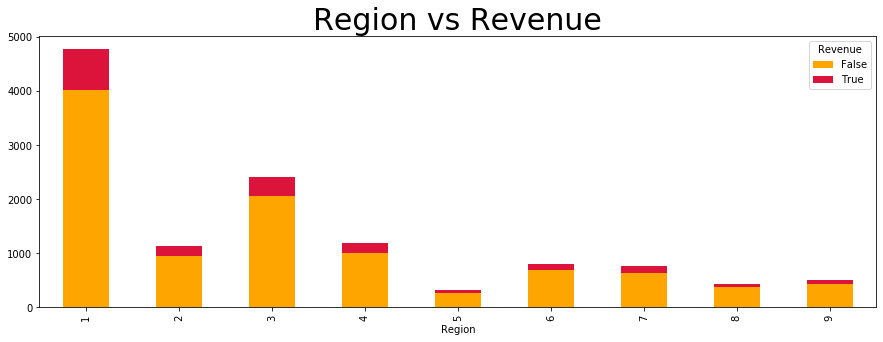

In [9]:
# Region vs Revenue
df = pd.crosstab(data['Region'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Region vs Revenue', fontsize = 30)

print(data[['Region', 'Revenue']].groupby(['Region'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

    TrafficType   Revenue
15           16  0.333333
6             7  0.300000
7             8  0.276968
19           20  0.252525
1             2  0.216458
4             5  0.215385
9            10  0.200000
10           11  0.190283
3             4  0.154350
13           14  0.153846
5             6  0.119369
0             1  0.106895
8             9  0.095238
2             3  0.087719
18           19  0.058824
12           13  0.058266
11           12  0.000000
14           15  0.000000
16           17  0.000000
17           18  0.000000


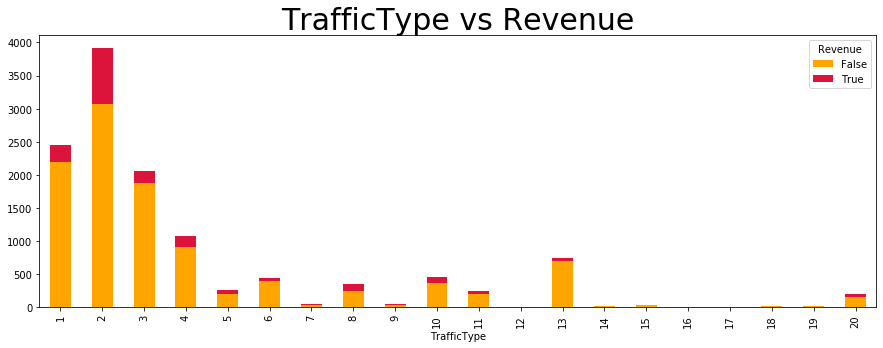

In [10]:
# TrafficType vs Revenue
df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('TrafficType vs Revenue', fontsize = 30)

print(data[['TrafficType', 'Revenue']].groupby(['TrafficType'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

  Month   Revenue
7   Nov  0.253502
8   Oct  0.209472
9   Sep  0.191964
0   Aug  0.175520
3   Jul  0.152778
1   Dec  0.125072
6   May  0.108502
4  June  0.100694
5   Mar  0.100682
2   Feb  0.016304


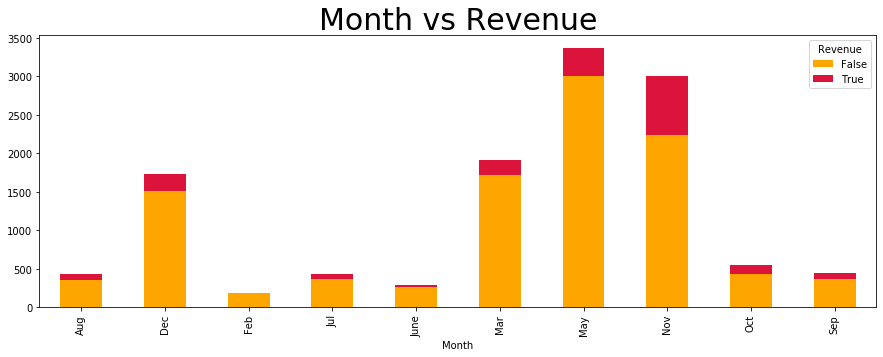

In [11]:
# Month vs Revenue
df = pd.crosstab(data['Month'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Month vs Revenue', fontsize = 30)

print(data[['Month', 'Revenue']].groupby(['Month'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

特定月份會影響購買意願，可能與該月份節日有關。

         VisitorType   Revenue
0        New_Visitor  0.249115
1              Other  0.188235
2  Returning_Visitor  0.139323


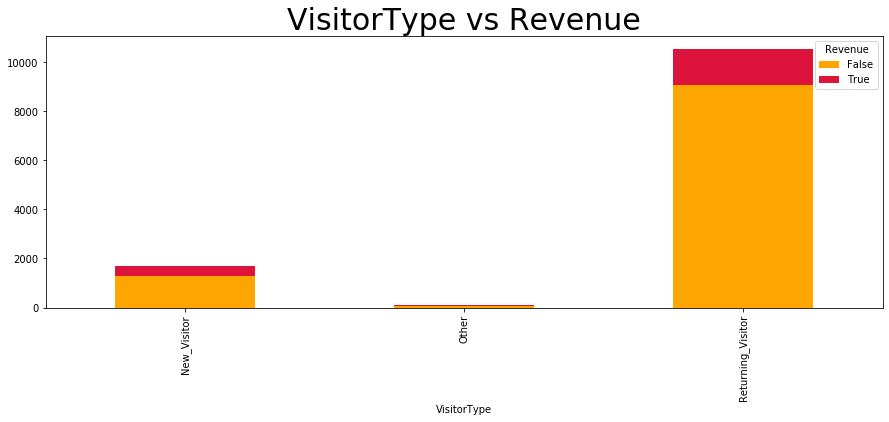

In [12]:
# VisitorType vs Revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('VisitorType vs Revenue', fontsize = 30)

print(data[['VisitorType', 'Revenue']].groupby(['VisitorType'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

ExitRates                 -0.207071
BounceRates               -0.150673
SpecialDay                -0.082305
OperatingSystems          -0.014668
Region                    -0.011595
TrafficType               -0.005113
Browser                    0.023984
Weekend                    0.029295
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
ProductRelated_Duration    0.152373
ProductRelated             0.158538
PageValues                 0.492569
Revenue                    1.000000
Name: Revenue, dtype: float64


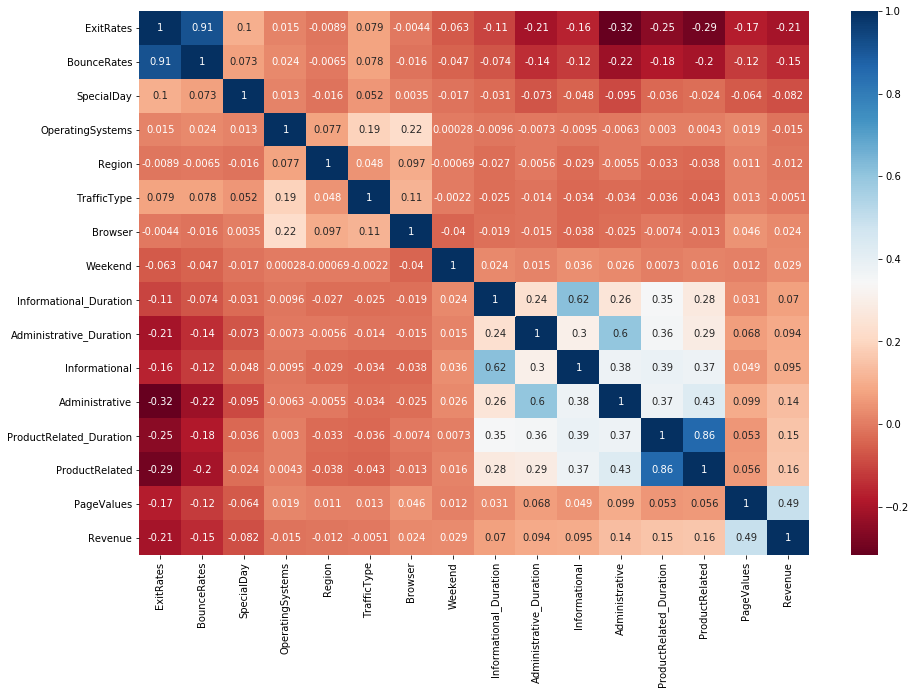

In [13]:
# correlated value about 'Revenue'
sorted_corrs = data.corr()['Revenue'].sort_values()
print(sorted_corrs)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data[sorted_corrs.index].corr(), cmap='RdBu', annot=True)

有correletad features，但對分類問題和分類模型較無影響，特別是decision tree、random forest等模型。

In [14]:
# 將字串轉成int
labelencoder = LabelEncoder()
data['Month'] = labelencoder.fit_transform(data['Month'])
data['VisitorType'] = labelencoder.fit_transform(data['VisitorType'])
data['Weekend'] = labelencoder.fit_transform(data['Weekend'])
data['Revenue'] = labelencoder.fit_transform(data['Revenue'])

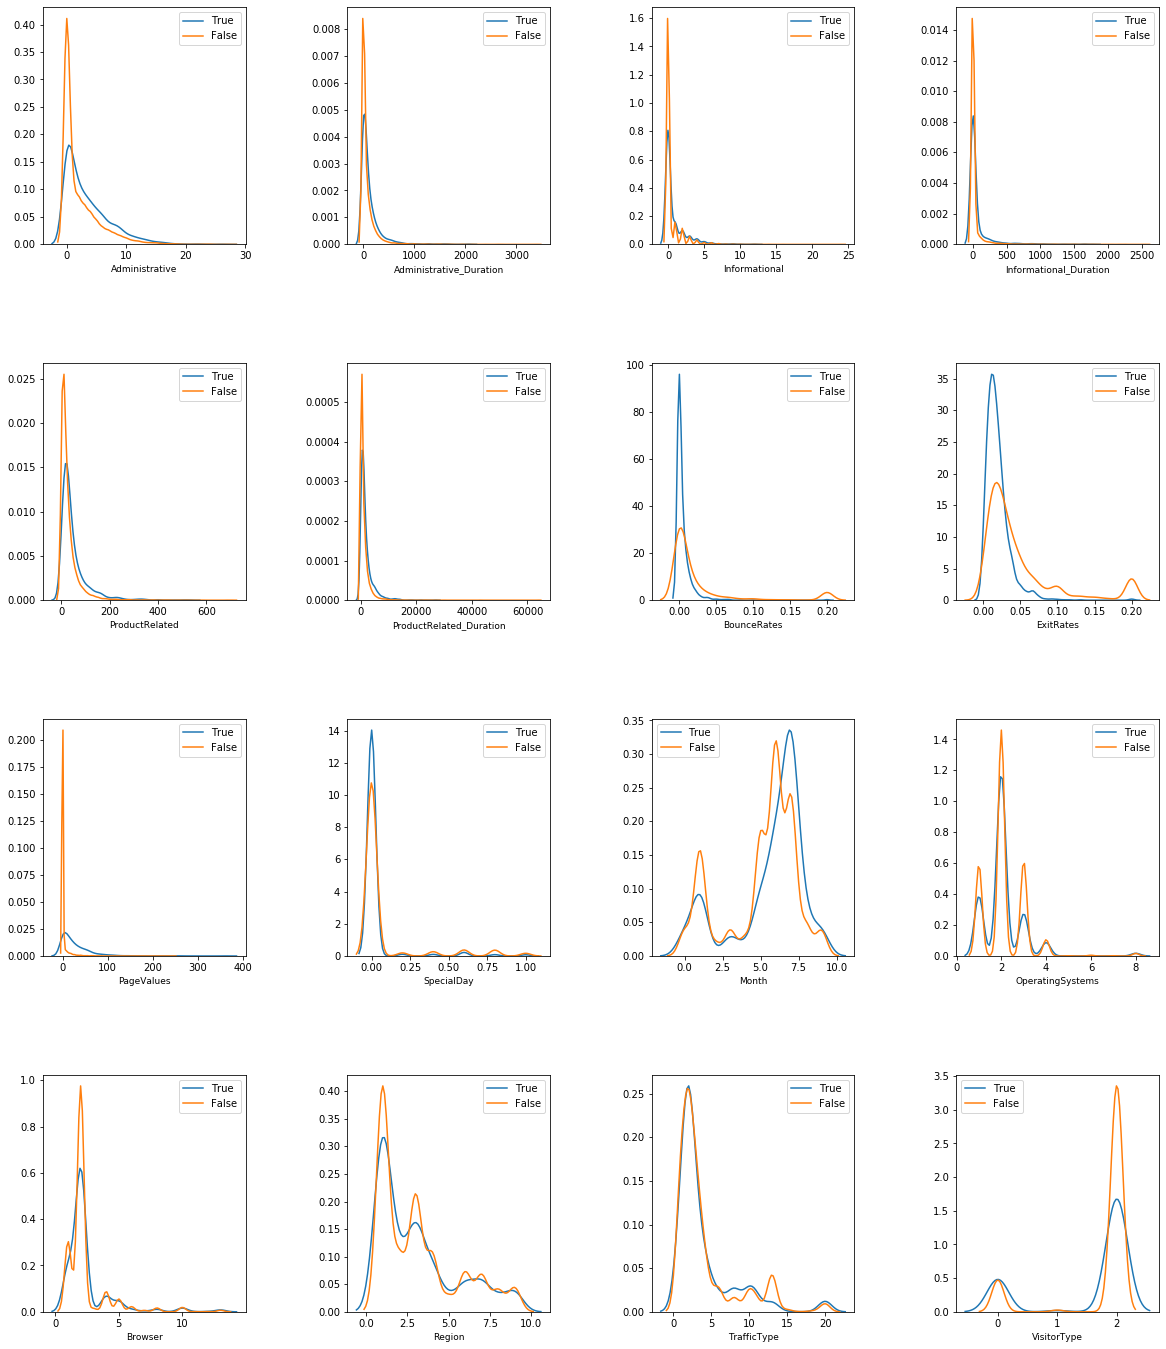

In [15]:
pos = 0
attribute = data.columns.values[0:16]
fig, ax = plt.subplots(4,4,figsize=(20,24))

for attr in attribute:
    pos += 1

    plt.subplot(4,4,pos)
    sns.distplot(data.loc[data['Revenue'] == True][attr], hist=False,label='True')
    sns.distplot(data.loc[data['Revenue'] == False][attr], hist=False,label='False')
    plt.xlabel(attr, fontsize=9)

# 調整子圖間距
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

根據'Revenue'為True或False繪製的16種attrbute分布圖。大部分趨勢相同，但有部分分布圖有顯著差異。

    Administrative   Revenue
25              26  1.000000
22              22  0.500000
20              20  0.500000
13              13  0.339286
16              16  0.333333
11              11  0.295238
14              14  0.272727
9                9  0.271111
6                6  0.256944
8                8  0.254355
17              17  0.250000
12              12  0.244186
1                1  0.214919
15              15  0.210526
10              10  0.209150
5                5  0.205217
4                4  0.200000
7                7  0.195266
3                3  0.190164
2                2  0.184022
18              18  0.166667
19              19  0.166667
0                0  0.089112
23              23  0.000000
24              24  0.000000
21              21  0.000000
26              27  0.000000


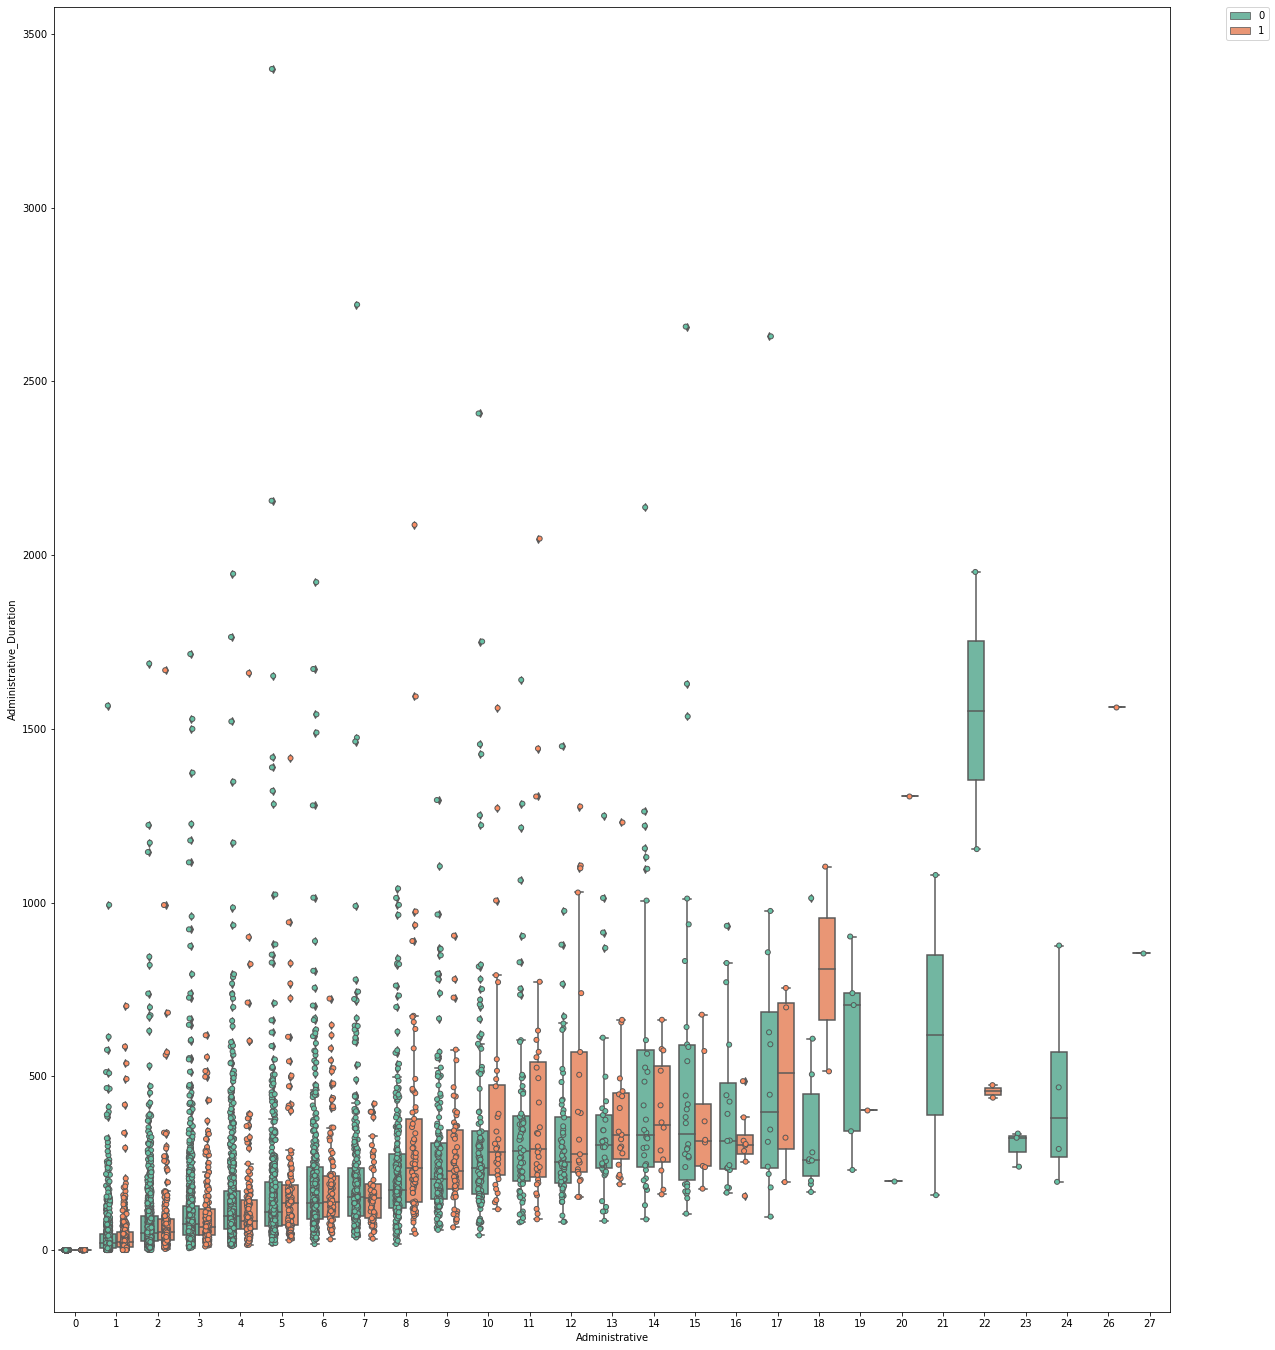

In [16]:
fig, ax = plt.subplots(figsize=(20,24))
# 箱型圖
sns.boxplot(data['Administrative'], data['Administrative_Duration'], data['Revenue'], palette="Set2")
# 散布圖
sns.stripplot(data['Administrative'],data['Administrative_Duration'], data['Revenue'],jitter=True,palette="Set2", dodge=True,linewidth=1,edgecolor='gray')


# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# 設立legend以取代箱型圖、散布圖重複的legend
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(data[['Administrative', 'Revenue']].groupby(['Administrative'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

根據箱型圖和散布圖，可以看出有很多離群值。

In [17]:
for v in data['Administrative'].unique():
    t = data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True), 'Administrative_Duration']
    # 四分位數和上下界
    Q1 = t.quantile(0.25)
    Q3 = t.quantile(0.75)
    Q2 = Q3 - Q1
    min = Q1 - 1.5 * Q2
    max = Q3 + 1.5 *Q2
    
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] <= min), 'Administrative_Duration'] = 0
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] > min) & (data['Administrative_Duration'] <= Q1), 'Administrative_Duration'] = 1
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] > Q1) & (data['Administrative_Duration'] <= Q2), 'Administrative_Duration'] = 2
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] > Q2) & (data['Administrative_Duration'] <= Q3), 'Administrative_Duration'] = 3
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] > Q3) & (data['Administrative_Duration'] <= max), 'Administrative_Duration'] = 4
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == True) & (data['Administrative_Duration'] > max), 'Administrative_Duration'] = 5
    
    t = data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False), 'Administrative_Duration']
    Q1 = t.quantile(0.25)
    Q3 = t.quantile(0.75)
    Q2 = Q3 - Q1
    max = t.max()
    min = t.min()
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] <= min), 'Administrative_Duration'] = 0
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] > min) & (data['Administrative_Duration'] <= Q1), 'Administrative_Duration'] = 1
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] > Q1) & (data['Administrative_Duration'] <= Q2), 'Administrative_Duration'] = 2
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] > Q2) & (data['Administrative_Duration'] <= Q3), 'Administrative_Duration'] = 3
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] > Q3) & (data['Administrative_Duration'] <= max), 'Administrative_Duration'] = 4
    data.loc[ (data['Administrative'] == v) & (data['Revenue'] == False) & (data['Administrative_Duration'] > max), 'Administrative_Duration'] = 5

根據箱型圖4分位數和上下界將資料簡化，並消除離群值。

    Informational   Revenue
12             12  0.400000
9               9  0.400000
5               5  0.313131
8               8  0.285714
10             10  0.285714
4               4  0.279279
3               3  0.244737
1               1  0.226705
6               6  0.217949
2               2  0.211538
7               7  0.166667
0               0  0.133519
11             11  0.000000
13             13  0.000000
14             14  0.000000
15             16  0.000000
16             24  0.000000


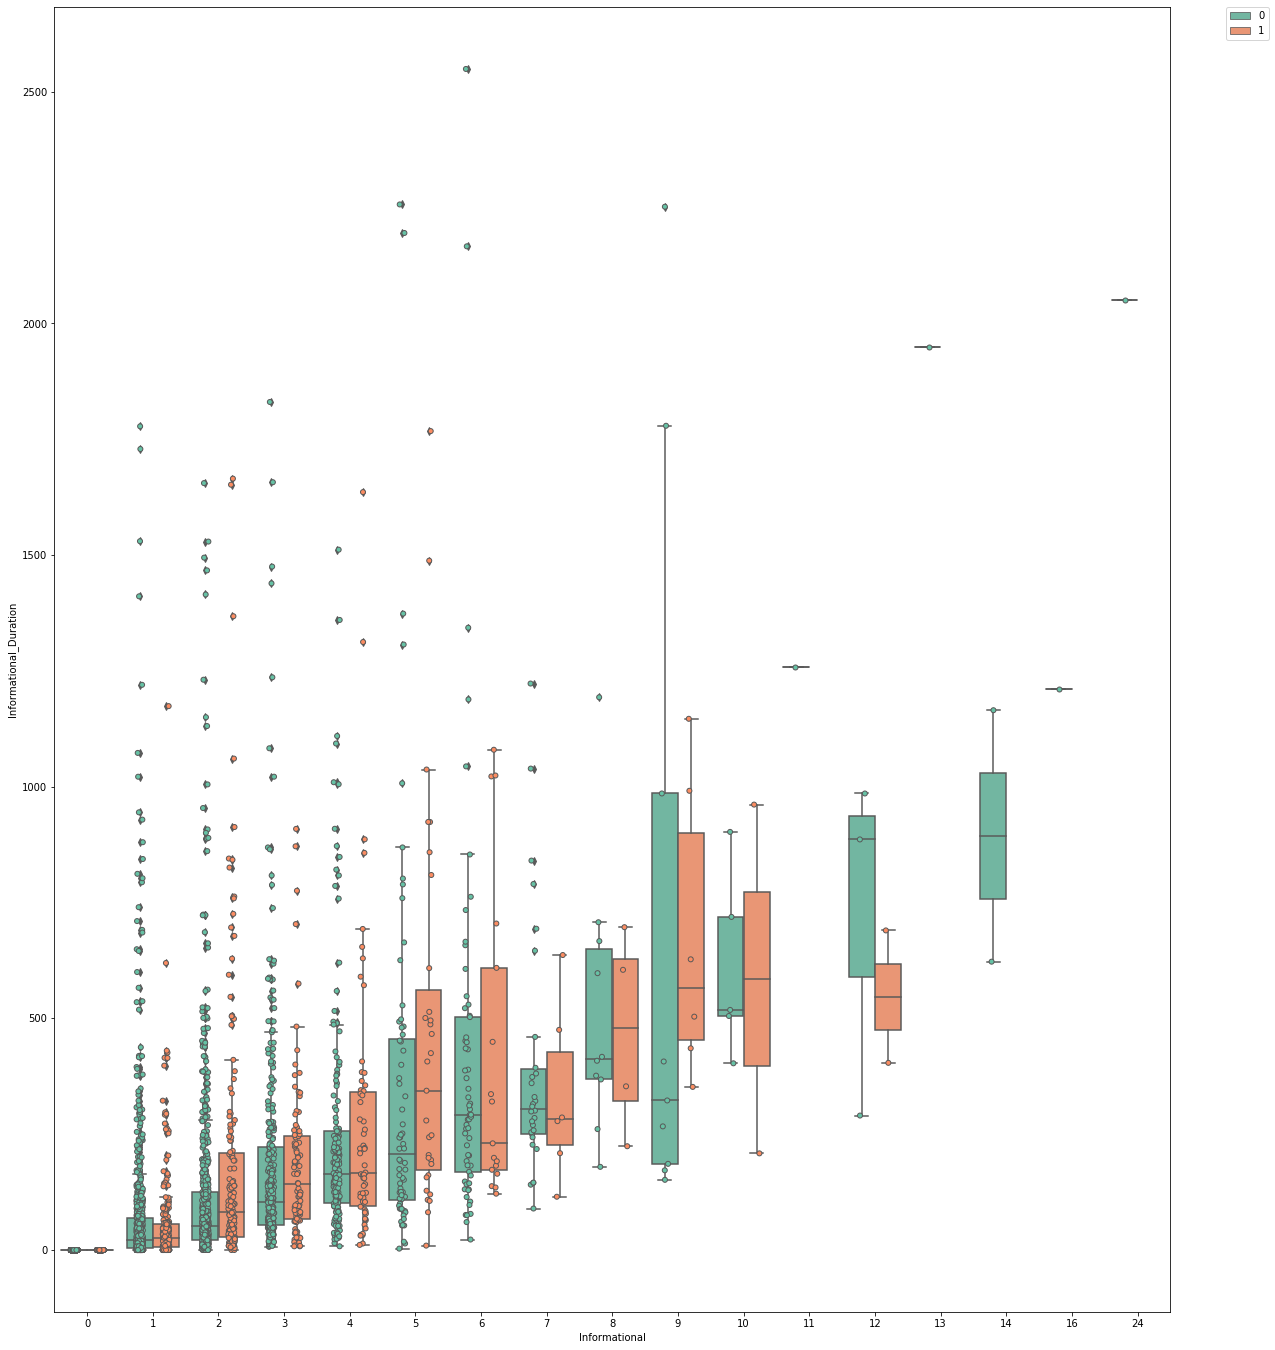

In [18]:
fig, ax = plt.subplots(figsize=(20,24))
sns.boxplot(data['Informational'], data['Informational_Duration'], data['Revenue'], palette="Set2")
sns.stripplot(data['Informational'],data['Informational_Duration'], data['Revenue'],jitter=True,palette="Set2", dodge=True,linewidth=1,edgecolor='gray')

# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(data[['Informational', 'Revenue']].groupby(['Informational'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

In [19]:
for v in data['Informational'].unique():
    t = data.loc[ (data['Informational'] == v) & (data['Revenue'] == True), 'Informational_Duration']
    Q1 = t.quantile(0.25)
    Q3 = t.quantile(0.75)
    Q2 = Q3 - Q1
    min = Q1 - 1.5 * Q2
    max = Q3 + 1.5 *Q2
    
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] <= min), 'Informational_Duration'] = 0
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] > min) & (data['Informational_Duration'] <= Q1), 'Informational_Duration'] = 1
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] > Q1) & (data['Informational_Duration'] <= Q2), 'Informational_Duration'] = 2
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] > Q2) & (data['Informational_Duration'] <= Q3), 'Informational_Duration'] = 3
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] > Q3) & (data['Informational_Duration'] <= max), 'Informational_Duration'] = 4
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == True) & (data['Informational_Duration'] > max), 'Informational_Duration'] = 5
    
    t = data.loc[ (data['Informational'] == v) & (data['Revenue'] == False), 'Informational_Duration']
    Q1 = t.quantile(0.25)
    Q3 = t.quantile(0.75)
    Q2 = Q3 - Q1
    max = t.max()
    min = t.min()
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] <= min), 'Informational_Duration'] = 0
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] > min) & (data['Informational_Duration'] <= Q1), 'Informational_Duration'] = 1
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] > Q1) & (data['Informational_Duration'] <= Q2), 'Informational_Duration'] = 2
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] > Q2) & (data['Informational_Duration'] <= Q3), 'Informational_Duration'] = 3
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] > Q3) & (data['Informational_Duration'] <= max), 'Informational_Duration'] = 4
    data.loc[ (data['Informational'] == v) & (data['Revenue'] == False) & (data['Informational_Duration'] > max), 'Informational_Duration'] = 5

     ProductRelated  Revenue
250             276      1.0
241             260      1.0
234             248      1.0
230             243      1.0
262             304      1.0
..              ...      ...
105             105      0.0
121             121      0.0
128             128      0.0
135             135      0.0
310             705      0.0

[311 rows x 2 columns]


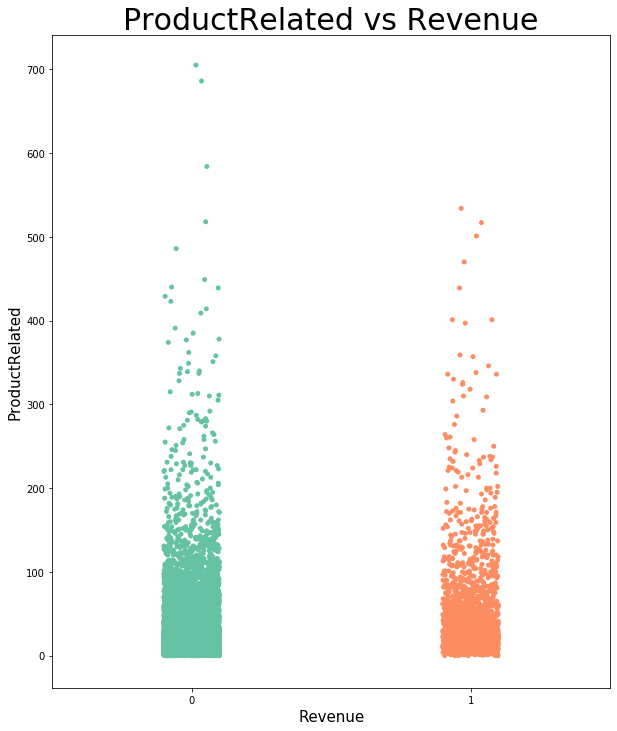

In [20]:
fig, ax = plt.subplots(figsize=(10,12))
# 散布圖
sns.stripplot(data['Revenue'], data['ProductRelated'], palette="Set2")
title = 'ProductRelated vs Revenue' 
plt.title(title, fontsize = 30)
plt.ylabel('ProductRelated', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)


print(data[['ProductRelated', 'Revenue']].groupby(['ProductRelated'], as_index=False).mean().sort_values(by='Revenue', ascending=False))

太多ProductRelated value，因此只觀察散布圖，同樣有不少離群值。

In [21]:
for v in data['ProductRelated'].unique():
    t = data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True), 'ProductRelated_Duration']
    if(len(t) >0):
        Q1 = np.nanpercentile(t, 25)
        Q3 = np.nanpercentile(t, 75)
        Q2 = Q3 - Q1
        min = Q1 - 1.5 * Q2
        max = Q3 + 1.5 *Q2

        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] <= min), 'ProductRelated_Duration'] = 0
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] > min) & (data['ProductRelated_Duration'] <= Q1), 'ProductRelated_Duration'] = 1
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] > Q1) & (data['ProductRelated_Duration'] <= Q2), 'ProductRelated_Duration'] = 2
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] > Q2) & (data['ProductRelated_Duration'] <= Q3), 'ProductRelated_Duration'] = 3
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] > Q3) & (data['ProductRelated_Duration'] <= max), 'ProductRelated_Duration'] = 4
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == True) & (data['ProductRelated_Duration'] > max), 'ProductRelated_Duration'] = 5

    t = data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False), 'ProductRelated_Duration']
    if(len(t) >0):
        Q1 = t.quantile(0.25)
        Q3 = t.quantile(0.75)
        Q2 = Q3 - Q1
        max = t.max()
        min = t.min()
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] <= min), 'ProductRelated_Duration'] = 0
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] > min) & (data['ProductRelated_Duration'] <= Q1), 'ProductRelated_Duration'] = 1
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] > Q1) & (data['ProductRelated_Duration'] <= Q2), 'ProductRelated_Duration'] = 2
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] > Q2) & (data['ProductRelated_Duration'] <= Q3), 'ProductRelated_Duration'] = 3
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] > Q3) & (data['ProductRelated_Duration'] <= max), 'ProductRelated_Duration'] = 4
        data.loc[ (data['ProductRelated'] == v) & (data['Revenue'] == False) & (data['ProductRelated_Duration'] > max), 'ProductRelated_Duration'] = 5

根據箱型圖4分位數和上下界將資料簡化，並消除離群值。

Text(0.5, 0, 'Revenue')

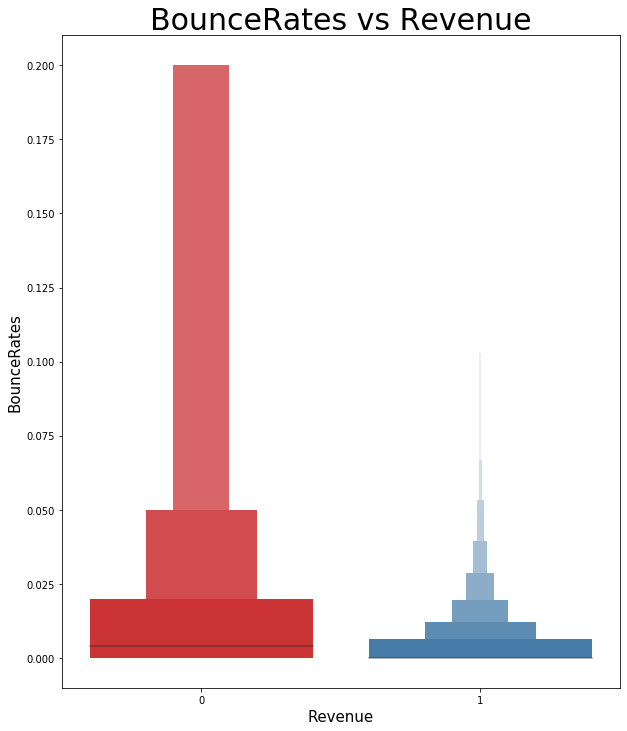

In [22]:
fig, ax = plt.subplots(figsize=(10,12))
# 增強箱型圖
sns.boxenplot(data['Revenue'], data['BounceRates'], palette = 'Set1')
title = 'BounceRates vs Revenue' 
plt.title(title, fontsize = 30)
plt.ylabel('BounceRates', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

Text(0.5, 0, 'Revenue')

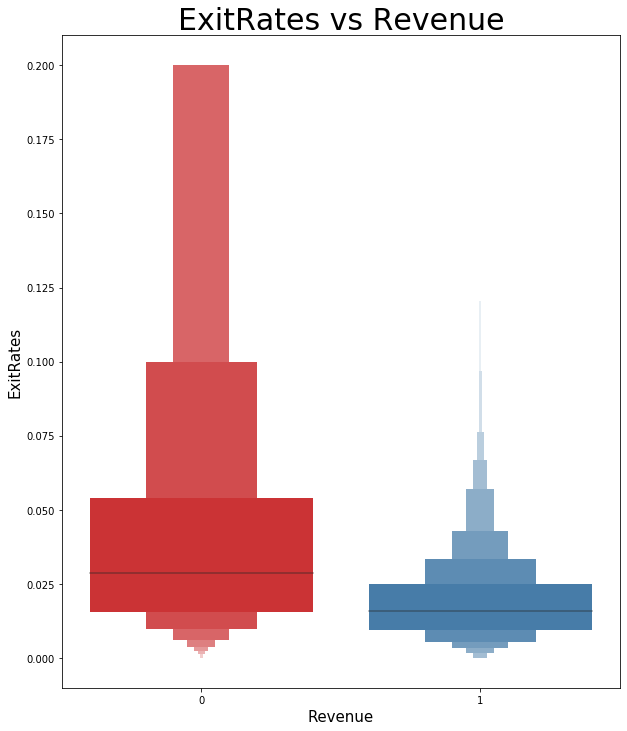

In [23]:
fig, ax = plt.subplots(figsize=(10,12))
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'Set1')
title = 'ExitRates vs Revenue' 
plt.title(title, fontsize = 30)
plt.ylabel('ExitRates', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

Text(0.5, 0, 'Revenue')

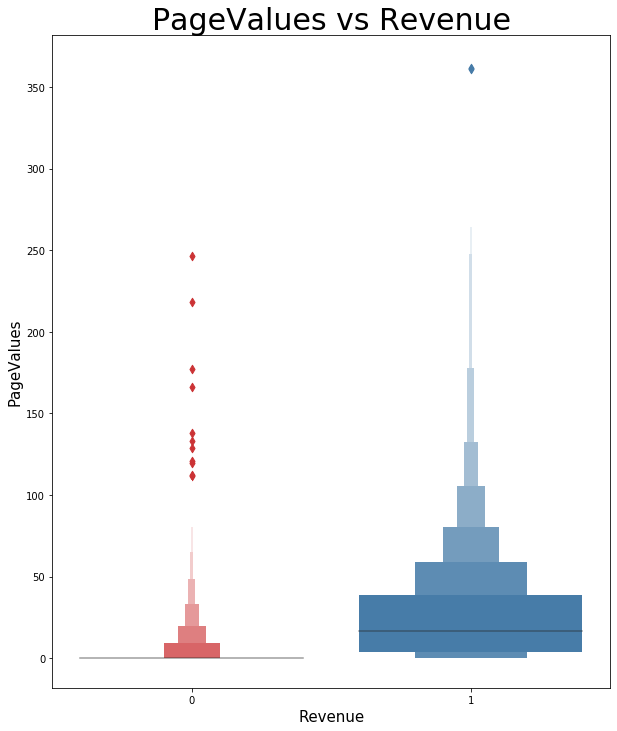

In [24]:
fig, ax = plt.subplots(figsize=(10,12))
sns.boxenplot(data['Revenue'], data['PageValues'], palette = 'Set1')
title = 'PageValues vs Revenue' 
plt.title(title, fontsize = 30)
plt.ylabel('PageValues', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

只有PageValues有明顯離群值。

處理PageValues離群值，限制在上下界。

In [25]:
t = data.loc[ data['Revenue'] == True, 'PageValues']
f = data.loc[ data['Revenue'] == False, 'PageValues']

Q1 = t.quantile(0.25)
Q3 = t.quantile(0.75)
IQR = Q3 - Q1
# 上下界
max = Q3 + 1.5 *IQR
min = Q1 - 1.5 * IQR

data.loc[ (data['Revenue'] == True) & (data['PageValues'] <= min) , 'PageValues'] = min
data.loc[ (data['Revenue'] == True) & (data['PageValues'] >= max) , 'PageValues'] = max

Q1 = f.quantile(0.25)
Q3 = f.quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5 *IQR
min = Q1 - 1.5 * IQR

data.loc[ (data['Revenue'] == False) & (data['PageValues'] <= min) , 'PageValues'] = min
data.loc[ (data['Revenue'] == False) & (data['PageValues'] >= max) , 'PageValues'] = max



將類別資料做one hot encoder，因為若只數值化可能有讓model誤判label後的數字有排序關係而影響預測結果。

In [26]:
data = pd.get_dummies(data, columns=['SpecialDay', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType'])

# 預測  
以random forest做類別預測

In [27]:
test = data['Revenue']
train = data.drop(['Revenue'], axis=1)
random_seed = 6

# 切取訓練集、驗證集
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    test, test_size = 0.2, 
                                                    random_state = 2)

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(X_train)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(X_train):    # 每個迴圈都會產生不同部份的資料
    train_x_split = X_train.iloc[train_index]         # 產生訓練資料
    train_y_split = y_train.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = X_train.iloc[valid_index]         # 產生驗證資料
    valid_y_split = y_train.iloc[valid_index]         # 產生驗證資料標籤
    
   
    random_forest = RandomForestClassifier(random_state=random_seed)
    random_forest.fit(train_x_split, train_y_split)

    train_pred_y = random_forest.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = random_forest.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)

    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
        'average train accuracy: {}\n' +
        '    min train accuracy: {}\n' +
        '    max train accuracy: {}\n' +
        'average valid accuracy: {}\n' +
        '    min valid accuracy: {}\n' +
        '    max valid accuracy: {}').format(
        np.mean(train_acc_list),                          # 輸出平均訓練準確度
        np.min(train_acc_list),                           # 輸出最低訓練準確度
        np.max(train_acc_list),                           # 輸出最高訓練準確度
        np.mean(valid_acc_list),                          # 輸出平均驗證準確度
        np.min(valid_acc_list),                           # 輸出最低驗證準確度
        np.max(valid_acc_list)                            # 輸出最高驗證準確度
    ))

average train accuracy: 1.0
    min train accuracy: 1.0
    max train accuracy: 1.0
average valid accuracy: 0.9731340130298584
    min valid accuracy: 0.9670385395537525
    max valid accuracy: 0.9787126203750633


# Report and Conclude  
1.離群值對預測結果會有很大的影響，在只做one hot encoder的情況下訓練出來的模型預測結果為90%，在消除離群值後的影響下準確率提升到97%，而且沒有overfitting。
2.與預測目標的correlated value值愈高的資料對預測準確率影響也愈明顯，消除PageValues的離群值對準確率的影響較其他資料明顯。